# For multiple base images

In [14]:
import os
import cv2

# Function to process images
def process_images(base_img_path, white_img_path, black_img_path, output_folder):
    # Load base image
    base_img = cv2.imread(base_img_path)
    base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

    # Load white overlay image and resize
    white = cv2.imread(white_img_path)
    white = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
    white = cv2.resize(white, (base_img.shape[1], base_img.shape[0]))

    # Load black overlay image and resize
    black = cv2.imread(black_img_path)
    black = cv2.cvtColor(black, cv2.COLOR_BGR2RGB)
    black = cv2.resize(black, (base_img.shape[1], base_img.shape[0]))

    # Overlay white on base image
    result_white = cv2.addWeighted(base_img, 0.8, white, 0.4, 0)

    # Overlay black on base image
    result_black = cv2.addWeighted(base_img, 1, black, 0.5, 0)

    # Save processed images to the specified output folder
    base_name = os.path.splitext(os.path.basename(base_img_path))[0]
    cv2.imwrite(os.path.join(output_folder, f'{base_name}_smoke_white.jpg'), cv2.cvtColor(result_white, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(output_folder, f'{base_name}_smoke_black.jpg'), cv2.cvtColor(result_black, cv2.COLOR_RGB2BGR))

# Paths to white and black overlay images
white_image_path = 'smoke_white.jpeg'
black_image_path = 'smoke_black.jpg'

# List files in the base_images folder
base_image_folder = 'base_images'
base_image_paths = [os.path.join(base_image_folder, f) for f in os.listdir(base_image_folder) if os.path.isfile(os.path.join(base_image_folder, f))]

# Output folder for processed images
output_folder = 'processed_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each base image
for base_img_path in base_image_paths:
    process_images(base_img_path, white_image_path, black_image_path, output_folder)


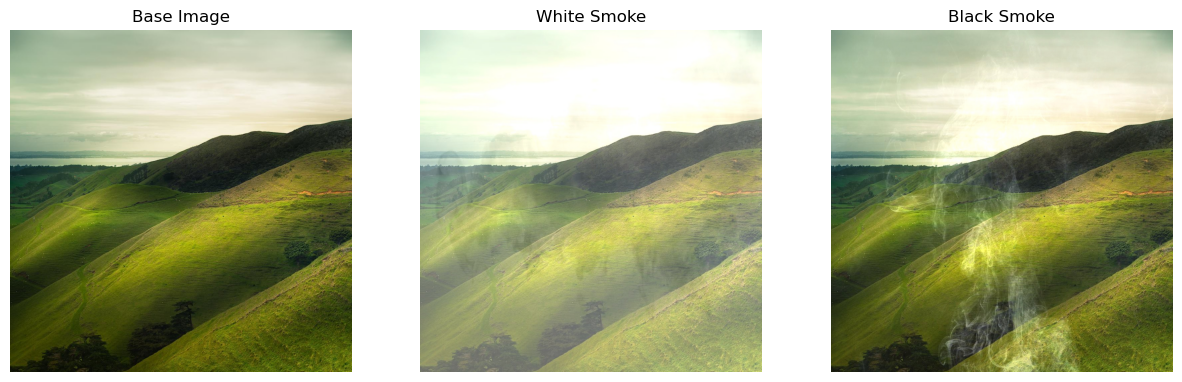

In [28]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(image_paths, titles):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for ax, img, title in zip(axes, image_paths, titles):
        ax.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Folder paths
base_images_folder = 'base_images'
processed_images_folder = 'processed_images'

# List base images
base_image_paths = [os.path.join(base_images_folder, f) for f in os.listdir(base_images_folder) if f.endswith('.jpg')]

# Choose one base image randomly
base_img_path = base_image_paths[0]

# Construct paths for white and black smoke images
base_name = os.path.splitext(os.path.basename(base_img_path))[0]
white_smoke_path = os.path.join(processed_images_folder, f'{base_name}_smoke_white.jpg')
black_smoke_path = os.path.join(processed_images_folder, f'{base_name}_smoke_black.jpg')

# Display images
display_images([base_img_path, white_smoke_path, black_smoke_path], ['Base Image', 'White Smoke', 'Black Smoke'])
